In [5]:
import pandas as pd
import mglearn
import random
import numpy as np



# Train-Test Split Function
The `train_test_split` function is responsible for splitting the dataset into training and test sets.

- $X$: Input features (matrix).
- $y$: Target values (vector).
- $test\_size$: Proportion of the dataset to include in the test split.
- $random\_state$: Seed for the random number generator, ensuring reproducibility.

In [6]:
def train_test_split(X, y, test_size=0.25, random_state=None):
    
    # Set random seed for reproducibility if random_state is provided
    if random_state is not None:
        np.random.seed(random_state)
        
        
    # Get the total number of samples
    n_samples = len(X)
    
    
    # Create an array of indices and shuffle them
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Determine the number of samples for the test set
    if isinstance(test_size, float):
        test_size = int(test_size * n_samples)
        
        
    # Extract indices for the test and training sets
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    
    # Use indices to split the data into training and testing sets
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


# Linear Regression Functions


## Coefficient calculation formula
The coefficients for linear regression are obtained using the normal equation:
$$
\text{coefficients} = (X_{\text{ext}}^T X_{\text{ext}})^{-1} X_{\text{ext}}^T y
$$

## Linear Regression Prediction formula
The prediction for linear regression is given by:
$$
y_{\text{pred}} = X_{\text{ext}} \cdot \text{coefficients}
$$


## Fitting Linear Regression
The `fit_linear_regression` function calculates the coefficients for linear regression using the normal equation.

- $X$: Input features.
- $y$: Target values.
- $X_{\text{ext}}$: Extended feature matrix with an added column of ones for the intercept term.
- $\text{coefficients}$: Coefficients for the intercept and features.

## Prediction
The `predict` function predicts target values based on input features and coefficients.

- $X$: Input features.
- $X_{\text{ext}}$: Extended feature matrix.
- $\text{coefficients}$: Coefficients obtained from linear regression.
- $y_{\text{pred}}$: Predicted target values.

In [7]:
def fit_linear_regression(X, y):
    
    # Add a column of ones to X for the intercept term
    X_ext = np.column_stack((np.ones(len(X)), X))
    
    # Calculate coefficients using the normal equation
    coefficients = np.dot(np.dot(np.linalg.pinv(np.dot(X_ext.T, X_ext)), X_ext.T), y)
    
    return coefficients

def predict(X, coefficients):
    
    
    # Add a column of ones to X for the intercept term
    X_ext = np.column_stack((np.ones(len(X)), X))
    
    # Calculate predicted target values using dot product
    y_pred = np.dot(X_ext, coefficients)
    
    return y_pred
    

## Mean Squared Error (MSE) formula
The Mean Squared Error (MSE) is calculated as follows:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2
$$



## Mean Squared Error Calculation
The `mean_squared_error` function calculates the mean squared error between true and predicted values.

- $y_{\text{true}}$: True target values.
- $y_{\text{pred}}$: Predicted target values.
- $\text{mse}$: Mean squared error.

In [8]:


def mean_squared_error(y_true, y_pred):
    
    
    # Ensure that the input arrays have the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays must have the same length.")

    # Calculate squared differences
    squared_diff = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]

    # Calculate mean squared error
    mse = sum(squared_diff) / len(y_true)

    return mse

In [9]:
# Load the extended Boston Housing dataset
X, y = mglearn.datasets.load_extended_boston()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Fit the linear regression model on the training set
coefficients = fit_linear_regression(X_train, y_train)

# Make predictions on the training set
y_train_pred = predict(X_train, coefficients)

# Make predictions on the test set
y_pred = predict(X_test, coefficients)


# Calculate Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_pred)


# Calculate Mean Squared Error (MSE) on the training set
mse_train = mean_squared_error(y_train, y_train_pred)


In [10]:
print("Mean Squared Error on Training Set:", mse_train)
print("Mean Squared Error on Test Set:", mse_test)

Mean Squared Error on Training Set: 5.119969179921958
Mean Squared Error on Test Set: 14.329434192452062


## Mean Squared Error (MSE) on Training Set
The Mean Squared Error on the training set is calculated as:
$$
MSE_{\text{train}} = 5.119969179921958
$$

## Mean Squared Error (MSE) on Test Set
The Mean Squared Error on the test set is calculated as:
$$
MSE_{\text{test}} = 14.329434192452062
$$


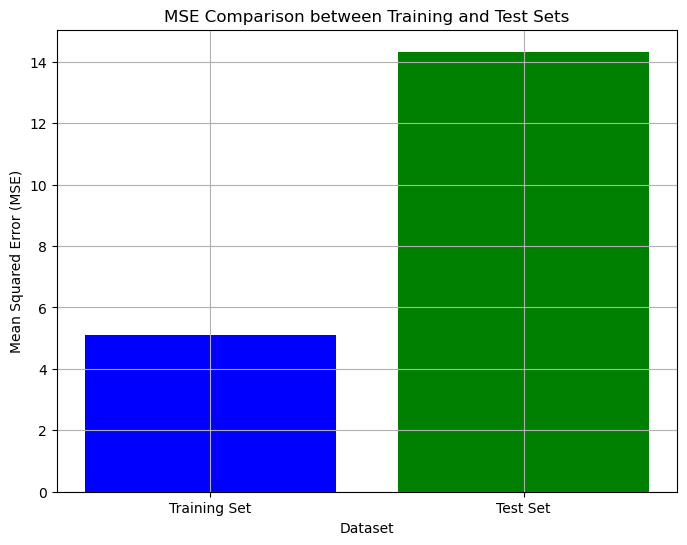

In [22]:
import matplotlib.pyplot as plt

# Calculate Mean Squared Error (MSE) for training and test sets
mse_values = [mse_train, mse_test]
set_labels = ['Training Set', 'Test Set']

# Create a bar plot to compare MSE values
plt.figure(figsize=(8, 6))
plt.bar(set_labels, mse_values, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison between Training and Test Sets')
plt.grid(True)
plt.show()
